In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 無作為なdataを生成する
$\sin(0) + 1 \le x \le \sin(20) + 1$

$0 \le x \le 2$

ただし, それぞれ最大1の誤差がある

In [2]:
t = np.arange(0, 1000)
x = np.sin(0.02 * t) + 1 + np.random.rand(1000)
df = pd.DataFrame(x)
df.head()

,0
0,1.759908
1,1.711527
2,1.606234
3,1.558282
4,2.031470


## 訓練用とテスト用に分ける

In [3]:
values = df.values
train, test = values[0:800, :], values[800:1000, :]

## dataを行列に変換する

In [4]:
def convertToMatrix(data, step=4):
    X, Y = [], []
    for i in range(len(data) - step):
        d = i + step
        X.append(data[i:d])
        Y.append(data[d])
    return np.array(X), np.array(Y)

In [5]:
trainX, trainY = convertToMatrix(train, 6)
testX, testY = convertToMatrix(test, 6)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Modelを作成する

In [6]:
model = Sequential()

2021-07-27 16:59:55.360157: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Modelにlayerを追加する

In [7]:
model.add(LSTM(units=4, input_shape=(1, 6), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

## Modelの設定を行う
- loss: 損失関数には平均二乗誤差を用いる
- optimizer: 最適化アルゴリズムにはRMSPropを用いる

In [8]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')

## 作成したModelの概要を見る

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 176       
_________________________________________________________________
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


## 学習

In [10]:
model.fit(trainX, trainY, epochs=10, batch_size=500, verbose=2)

2021-07-27 16:59:55.779137: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
2/2 - 20s - loss: 2.8783
Epoch 2/10
2/2 - 0s - loss: 2.7711
Epoch 3/10
2/2 - 0s - loss: 2.6986
Epoch 4/10
2/2 - 0s - loss: 2.6352
Epoch 5/10
2/2 - 0s - loss: 2.5754
Epoch 6/10
2/2 - 0s - loss: 2.5169
Epoch 7/10
2/2 - 0s - loss: 2.4588
Epoch 8/10
2/2 - 0s - loss: 2.4000
Epoch 9/10
2/2 - 0s - loss: 2.3405
Epoch 10/10
2/2 - 0s - loss: 2.2800


## 予測する

In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict, testPredict), axis=0)

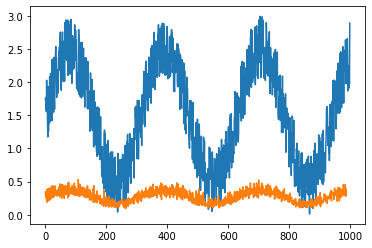

In [12]:
plt.figure()
plt.plot(x)
plt.plot(predicted)